In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# <center>Bank-Marketing Analysis

# Table of Contents

1. **[Project Background](#1)**
2. **[Data Cleaning](#2)**
3. **[Future Engineering](#3)**
4. **[Data Visualization(EDA)](#4)**
5. **[Model implemention](#5)**
6. **[Conclusion](#6)**

# Part 1. Project Background <a name= '1'></a>

Nowadays, marketing expenditure in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.

### Main Objective: increase the effectiveness of the bank's telemarketing campaign
This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans. 

In [ ]:
# Load all packages
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno #find missing data
from math import sqrt
import pylab as pl

from sklearn.feature_selection import RFE, RFECV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import VotingClassifier

import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from scipy.stats import randint as sp_randint
from scipy.stats import randint as sp_randint
from mpl_toolkits.mplot3d import Axes3D
from collections import  Counter

from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Part 2. Data Cleaning <a name= '2'></a>

## load the raw data

The data is related with direct marketing campaigns of a Portuguese banking institution.The marketing campaigns were based on phone calls.

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/data/bank-full.csv',sep = ';')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Start clean the dataset

In [ ]:
data = dataset.replace('unknown', np.nan)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


### 2.1 Find missing data

In [ ]:
data.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

<AxesSubplot:>

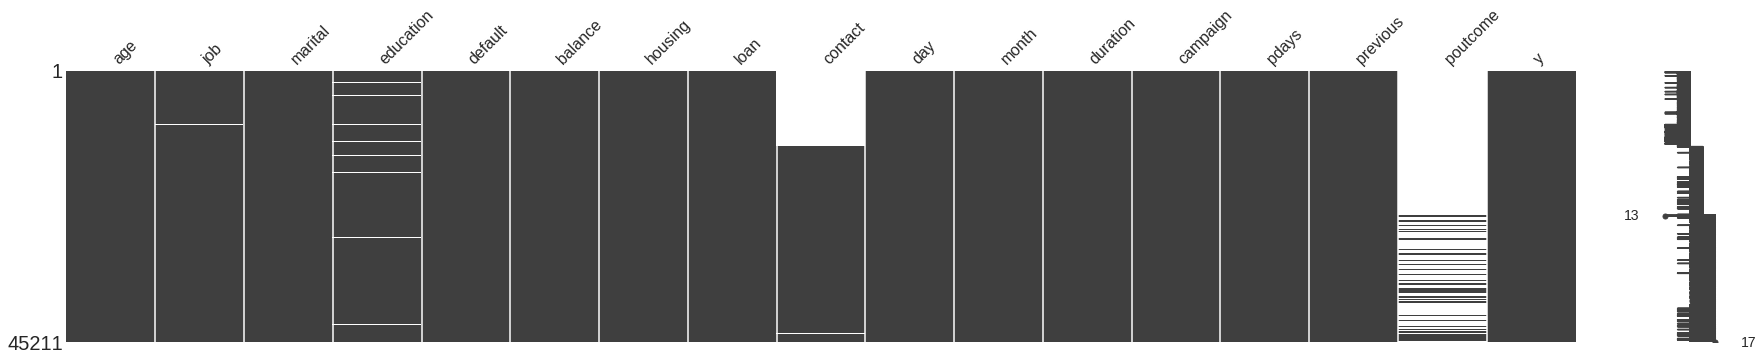

In [ ]:
# Try to find the missing data in the dataset
missingno.matrix(data, figsize = (30,5))

<AxesSubplot:>

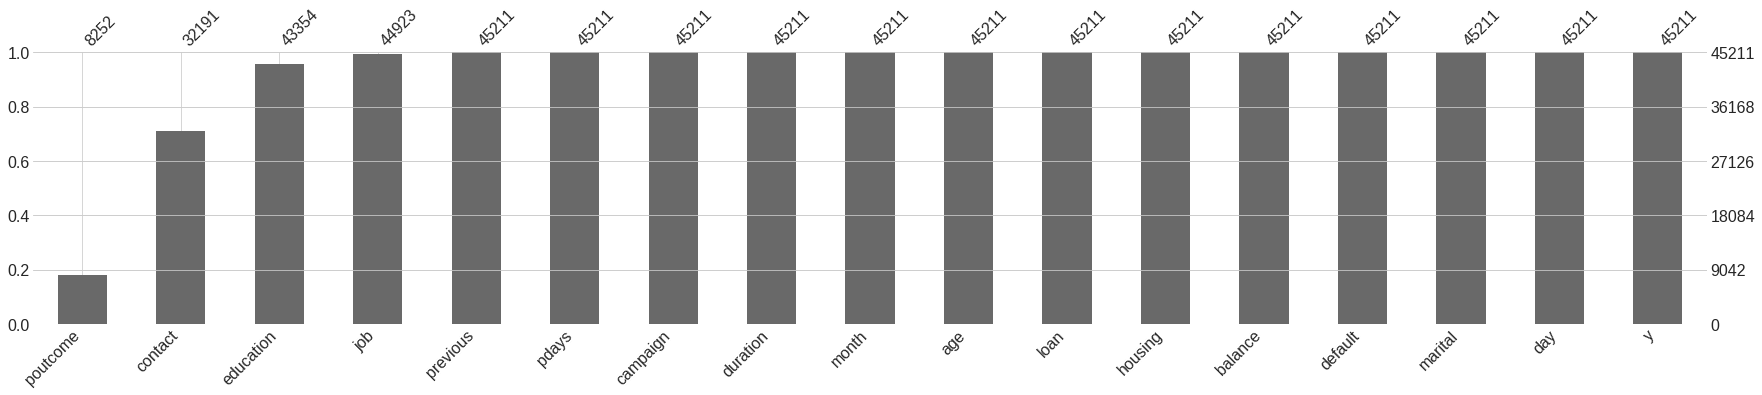

In [ ]:
missingno.bar(data, sort='ascending', figsize = (30,5))

The purpose of creating a new dataset that contains all the values that are unknown and replace them with nan values give us the real picture of where data is missing. 
One way to clean dataset is to delete it, but it gives a bad image of the data and it is unrealistic. Another way is to find some correlation between the data and fill it in.

4 columns have missing data: poutcome, contact, education, job

categorical data: education, job

numerical data: poutcome, contact

### 2.2 fill in categorical variables missing value:

In [ ]:
# There might be feature which can not be presented by numbers, so we need to do the transformation
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['job'] = data['job'].fillna(data['job'].mode()[0])

# data['default'] = data['default'].fillna(data['default'].mode()[0]) 
# data['marital'] = data['marital'].fillna(data['marital'].mode()[0])
# data['housing'] = data['housing'].fillna(data['housing'].mode()[0])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


### 2.3 Find numerical variables

In [ ]:
# We find the variables where the features are numerical
numerical_variables = ['age','campaign', 'pdays', 'previous']
data[numerical_variables].describe()

,age,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,2.763841,40.197828,0.580323
std,10.618762,3.098021,100.128746,2.303441
min,18.000000,1.000000,-1.000000,0.000000
25%,33.000000,1.000000,-1.000000,0.000000
50%,39.000000,2.000000,-1.000000,0.000000
75%,48.000000,3.000000,-1.000000,0.000000
max,95.000000,63.000000,871.000000,275.000000


We know that the missing values, or NaNs, in numeric variables are encoded as '999'. From the above table, it is clear that only 'pdays' has missing values. Moreover, a majority of the values for 'pdays' are missing.

### 2.4 convert categorical into digital，and fill in numerical missing value

In [ ]:
# map yes/no to 1/0
data['y'].replace({"no":0, "yes":1}, inplace=True) 

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,secondary,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,0
4,33,blue-collar,single,secondary,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,0


In [ ]:
Mean_encoded_job = data.groupby(['job'])['y'].mean().to_dict() 
data['job'] =  data['job'].map(Mean_encoded_job) 

Mean_encoded_marital = data.groupby(['marital'])['y'].mean().to_dict()   
data['marital'] =  data['marital'].map(Mean_encoded_marital) 

Mean_encoded_default = data.groupby(['default'])['y'].mean().to_dict()   
data['default'] =  data['default'].map(Mean_encoded_default)

Mean_encoded_housing = data.groupby(['housing'])['y'].mean().to_dict()   
data['housing'] =  data['housing'].map(Mean_encoded_housing)

Mean_encoded_loan = data.groupby(['loan'])['y'].mean().to_dict()   
data['loan'] =  data['loan'].map(Mean_encoded_loan)

Mean_encoded_contact = data.groupby(['contact'])['y'].mean().to_dict()   
data['contact'] =  data['contact'].map(Mean_encoded_contact)

Mean_encoded_month = data.groupby(['month'])['y'].mean().to_dict()   
data['month'] =  data['month'].map(Mean_encoded_month)

Mean_encoded_poutcome = data.groupby(['poutcome'])['y'].mean().to_dict()   
data['poutcome'] =  data['poutcome'].map(Mean_encoded_poutcome)

Mean_encoded_education = data.groupby(['education'])['y'].mean().to_dict()   
data['education'] =  data['education'].map(Mean_encoded_education)

In [ ]:
data_drop = pd.DataFrame()
data_drop = data
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  float64
 4   default    45211 non-null  float64
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  float64
 7   loan       45211 non-null  float64
 8   contact    32191 non-null  float64
 9   day        45211 non-null  int64  
 10  month      45211 non-null  float64
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   8252 non-null   float64
 16  y          45211 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 5.9 MB


<AxesSubplot:>

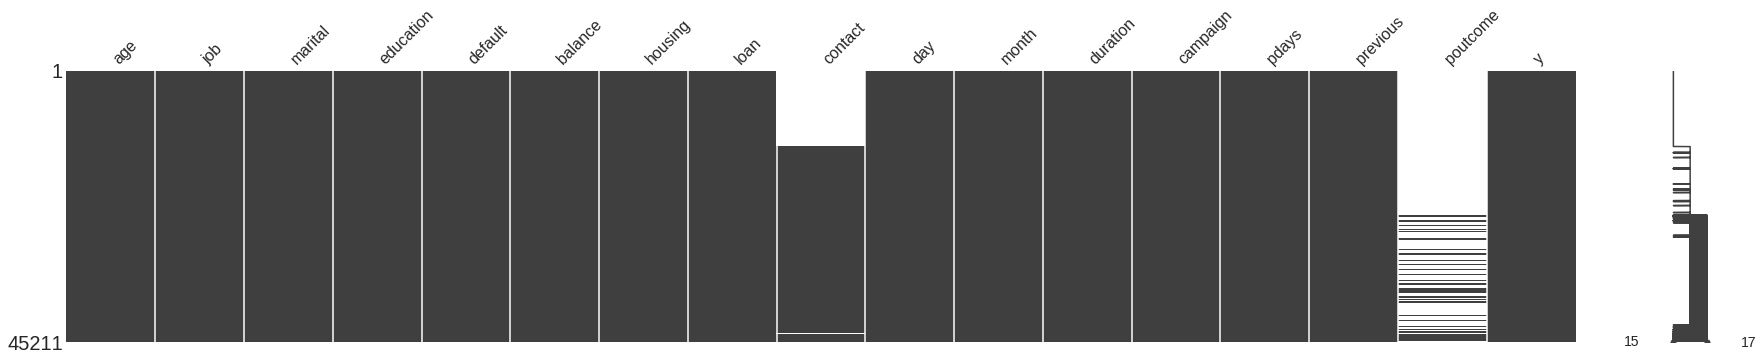

In [ ]:
missingno.matrix(data_drop, figsize = (30,5))

In [ ]:
data_drop.fillna(data_drop.mean(), inplace = True)

In [ ]:
data_drop.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.137556,0.101235,0.150064,0.117961,2143,0.077000,0.126557,0.147836,5,0.067195,261,1,-1,0,0.230611,0
1,44,0.110570,0.149492,0.107826,0.117961,29,0.077000,0.126557,0.147836,5,0.067195,151,1,-1,0,0.230611,0
2,33,0.082717,0.101235,0.107826,0.117961,2,0.077000,0.066814,0.147836,5,0.067195,76,1,-1,0,0.230611,0
3,47,0.074052,0.101235,0.107826,0.117961,1506,0.077000,0.126557,0.147836,5,0.067195,92,1,-1,0,0.230611,0
4,33,0.074052,0.149492,0.107826,0.117961,1,0.167024,0.126557,0.147836,5,0.067195,198,1,-1,0,0.230611,0


# Part3. Feature Engineering <a name= '3'></a>

### 3.1 Feature importance

Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. The measure based on which the (locally) optimal condition is chosen is called impurity. When training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure. This is the feature importance measure exposed in sklearn’s Random Forest implementations.

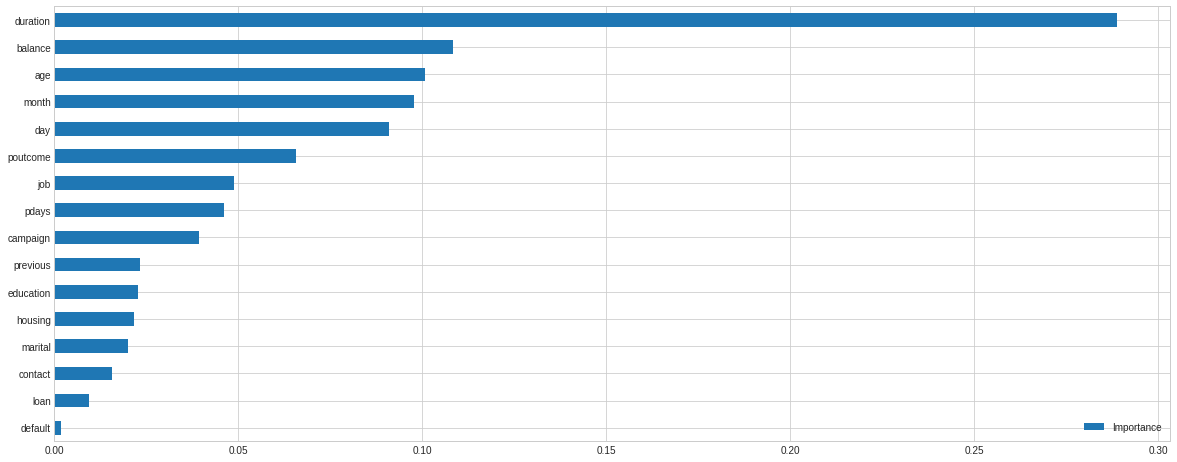

In [ ]:
# Using Random Forest to gain an insight on Feature Importance

clf = RandomForestClassifier()
clf.fit(data_drop.drop('y', axis=1), data_drop['y'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=data_drop.drop('y', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

### 3.2 PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

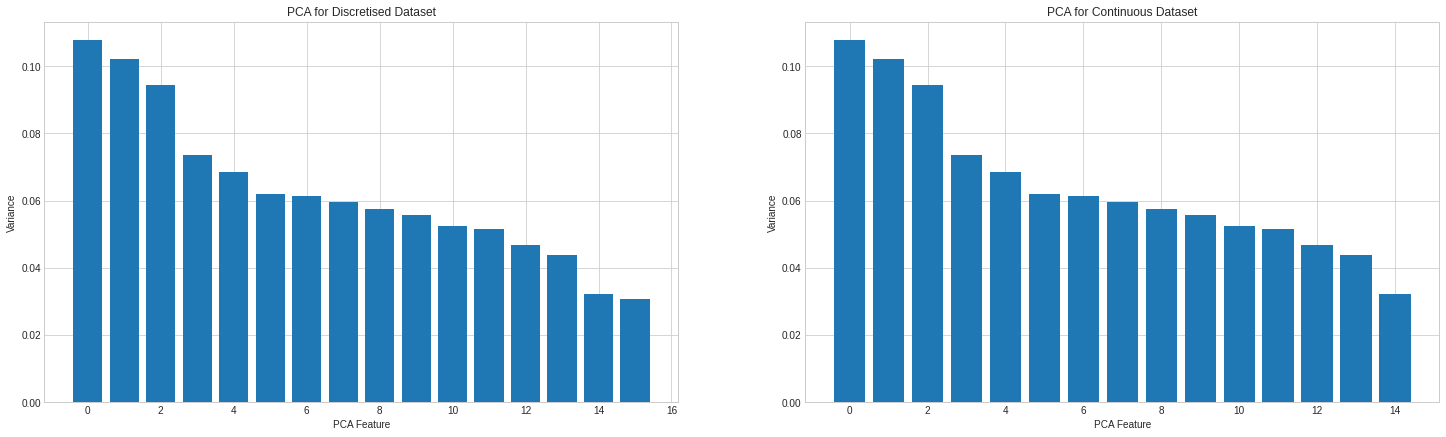

In [ ]:
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset

std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1)) # 标准化，避免不同特征之间的尺度不同而导致PCA的结果受到特征度量单位的影响。
X = std_scale.transform(data_drop.drop('y', axis=1))
pca1 = PCA(n_components=len(data_drop.columns)-1) # -1为y列，相当于保留除y以外的所有特征
fit1 = pca1.fit(X)

std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
pca2 = PCA(n_components=len(data_drop.columns)-2)
fit2 = pca2.fit(X)

# Graphing the variance per feature，横轴是主成分编号，纵轴是方差贡献率
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Discretised Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

plt.subplot(1, 2, 2)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Continuous Dataset')
plt.bar(range(0, fit2.explained_variance_ratio_.size), fit2.explained_variance_ratio_);

In [ ]:
std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))

X_pca = pca.transform(X[:, :3])

X_pca = np.hstack([X_pca, data_drop['y'].values.reshape(-1, 1)])

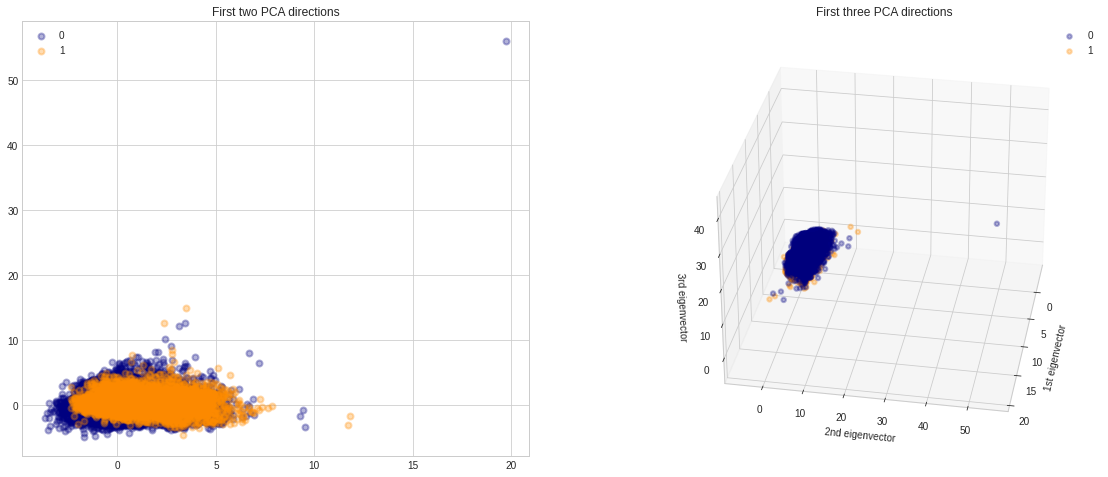

In [ ]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
y = data_drop['y']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

### 3.3 Recursive Feature Elimination

Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

Optimal number of features : 15


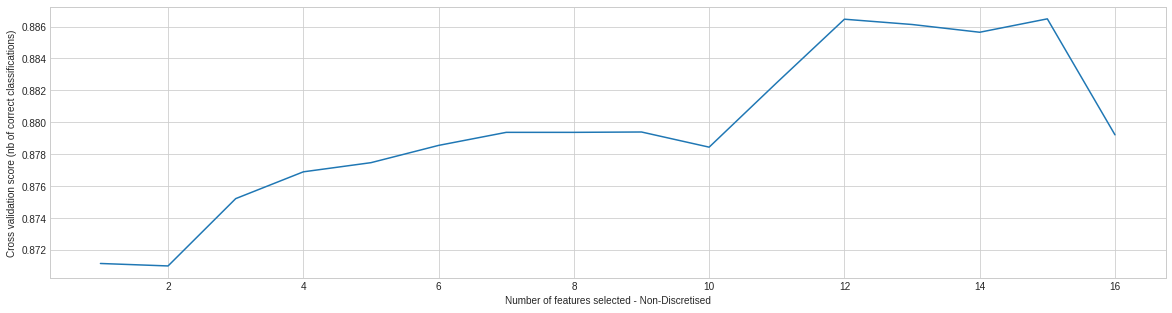

In [ ]:
# Calculating RFE for non-discretized dataset, and graphing the Importance for each feature, per dataset

selector1 = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)
selector1 = selector1.fit(data_drop.drop('y', axis=1).values, data_drop['y'].values)
#print("Feature Ranking For Non-Discretised: %s" % selector1.ranking_)
print("Optimal number of features : %d" % selector1.n_features_) 
# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid') 
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected - Non-Discretised") 
plt.ylabel("Cross validation score (nb of correct classifications)")

scores = 0
for i in range(0,5):
  scores += selector1.cv_results_['split{}_test_score'.format(i)] 
old_scores = scores / 5

plt.plot(range(1, len(old_scores)+1), old_scores); 

# Feature space could be subsetted like so:
data_drop_new = data_drop[data_drop.columns[np.insert(selector1.support_, 0, True)]].copy()

In [ ]:
data_drop_new.head()

,age,job,marital,education,default,balance,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.137556,0.101235,0.150064,0.117961,2143,0.126557,0.147836,5,0.067195,261,1,-1,0,0.230611,0
1,44,0.110570,0.149492,0.107826,0.117961,29,0.126557,0.147836,5,0.067195,151,1,-1,0,0.230611,0
2,33,0.082717,0.101235,0.107826,0.117961,2,0.066814,0.147836,5,0.067195,76,1,-1,0,0.230611,0
3,47,0.074052,0.101235,0.107826,0.117961,1506,0.126557,0.147836,5,0.067195,92,1,-1,0,0.230611,0
4,33,0.074052,0.149492,0.107826,0.117961,1,0.126557,0.147836,5,0.067195,198,1,-1,0,0.230611,0


# Part4. Data Visualization(EDA) <a name= '4'></a>

### 4.1 Show the distribution of different features

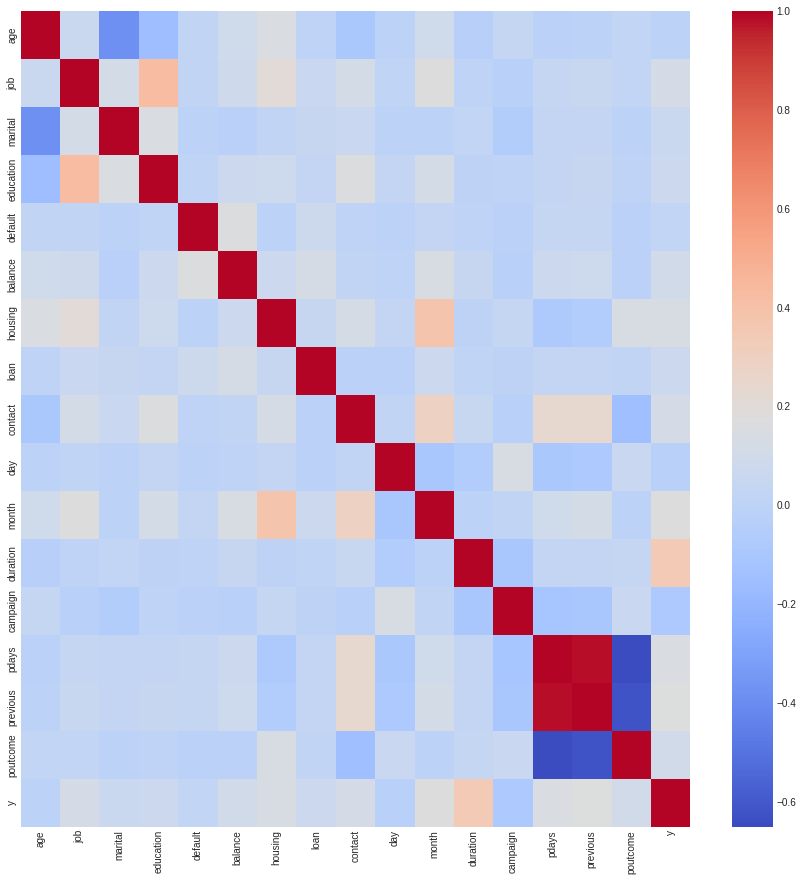

In [ ]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')
drawheatmap(data_drop)

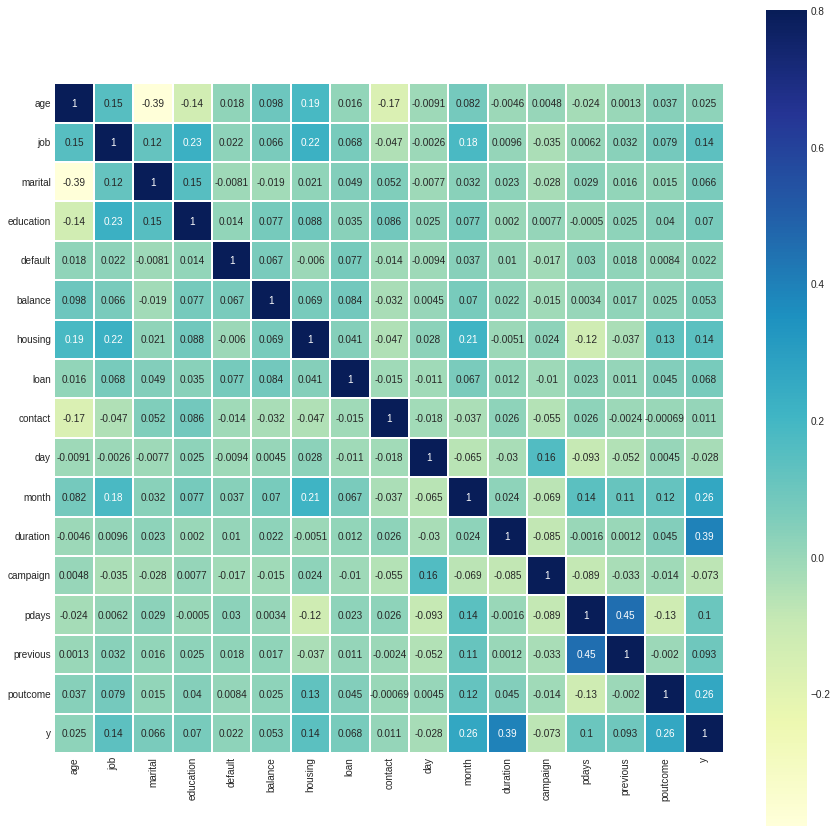

In [ ]:
def drawheatmap(df):
    matrix = data.corr()
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(matrix, vmax=.8, square=True, cmap='YlGnBu', ax=ax, annot=True, linewidth=0.1)
drawheatmap(data)

### 4.1 Visualize the subscription and contact rate by age

In the following blocks of this part, we will explore how the **most impact attributes(say, age/balance/job/month/housing)** influence the subscription rate

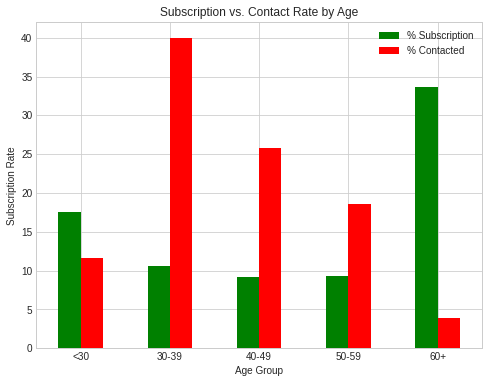

In [ ]:
lst = [data_drop_new] 
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20 
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

count_age_response_pct = pd.crosstab(data_drop_new['y'],data_drop_new['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(data_drop_new['age_group'].value_counts()) 
age['% Contacted'] = age['age_group']*100/age['age_group'].sum() 
age['% Subscription'] = count_age_response_pct[1]
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

### Insights from the plot 
* Green vertical bars indicate that clients with a **age of 60+** have the highest subscription rate. 
* We could clearly see that more than 50% of the subscriptions are contributed by **the youngest** and **the eldest clients**. 

### 4.2 Visualize the subscription rate and contact rate by balance level

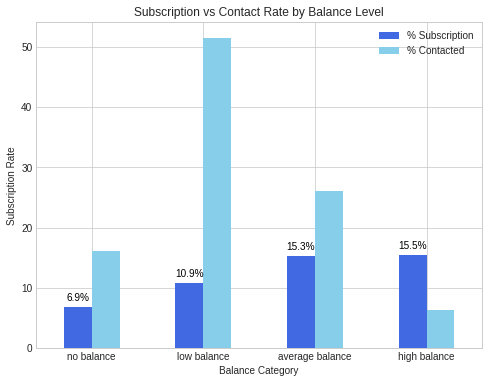

In [ ]:
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
count_balance_response_pct = pd.crosstab(data_drop_new['y'],data_drop_new['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()


bal = pd.DataFrame(data_drop_new['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)


bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)


plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1,  
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

### Insights from the plot 
* We could see that people with **nobalance or negative balance** tend to refuse subscription(subscription rate is only 6.9%). 
* Contacting people with **average or high balance** is more likely to get successful results(subscription rates are all over 15%).

### 4.3 Visualize the subscription rate by job

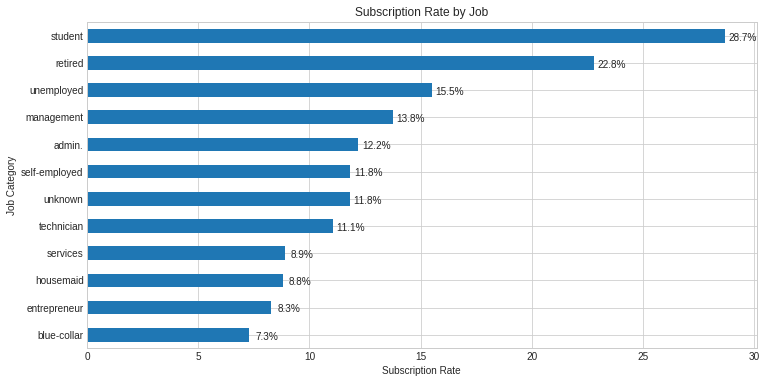

In [ ]:
count_job_response_pct = pd.crosstab(dataset['y'],dataset['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose() 
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh', figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### Insights from the plot 
* This visualization is consistent with the first plot(the youngest and oldest groups consist of the majority of positive cases). 
* **Students**(younger group) and **retired people**(elderly group) tend to subscribe this product.

### 4.4 Visualize the subscription and contact rate by month

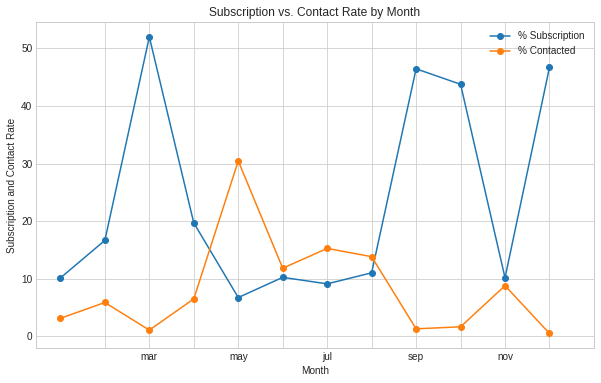

In [ ]:
count_month_response_pct = pd.crosstab(dataset['y'],dataset['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

month = pd.DataFrame(dataset['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)


month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)


plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                             figsize = (10,6),
                             marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

plt.show()

### Insights from the plot 
* From the figure above, we could conclude that contact rate and subscription rate have **opposite trendings**.
* Subscription rate reaches the peak in **March** (while contact rate is pretty low), and contact rate reaches the peak in **May**(subscription reaches the lowest points).

### 4.5 Visualize the subscription and contact rate by housing

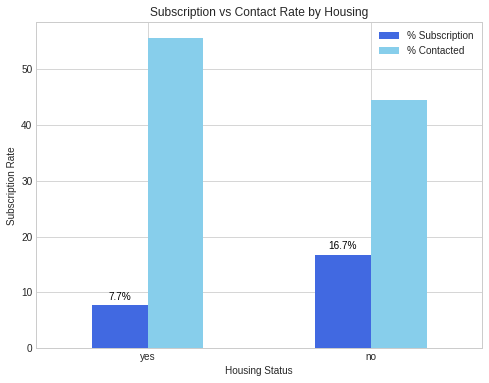

In [ ]:
count_housing_response_pct = pd.crosstab(dataset['y'],dataset['housing']).apply(lambda x: x/x.sum() * 100)
count_housing_response_pct = count_housing_response_pct.transpose()

housing = pd.DataFrame(dataset['housing'].value_counts())
housing['% Contacted'] = housing['housing']*100/housing['housing'].sum()
housing['% Subscription'] = count_housing_response_pct['yes']
housing.drop('housing',axis = 1,inplace = True)

plot_housing = housing[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Housing')
plt.ylabel('Subscription Rate')
plt.xlabel('Housing Status')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_housing.patches, housing['% Subscription'].round(1).astype(str)):
    plot_housing.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

### Insights from the plot 
* We could see that **people with no housing loan** tend to **subscribe** the term deposit, which is not surprising. Those people have much lower financial pressure. Thus, they have extra money to subscribe the term deposit.

# Part 5. Model implemention <a name= '5'></a>

### 5.1 train test split

In [ ]:
# # 20% of the data will be used for testing
test_size= 0.2
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=test_size, random_state=seed) 

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import  Counter

# Get extended X_train, Y_train
sm = SMOTE(random_state=2)
X_train_sample, Y_train_sample = sm.fit_resample(X_train, Y_train.values.ravel())

print("X Train:", X_train_sample.shape)
print("Y Train:", Y_train_sample.shape)
print("X Test:", X_test.shape)
print("Y Test:", Y_test.shape)
Counter(Y_train_sample)

X Train: (63790, 16)
Y Train: (63790,)
X Test: (9043, 16)
Y Test: (9043,)


Counter({0: 31895, 1: 31895})

### 5.2 Algorithms

From here, we will be running the following algorithms.

- Random Forest
- Naive Bayes
- SVM
- VotingClassifier
- LogisticRegression
- KNN
- AdaBoostClassifier
- BaggingClassifier

### 5.2.1 Random Forest Classifier

In [ ]:
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i) 
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate])) 
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None], 
              "max_features": sp_randint(2, 11), 
              "min_samples_split": sp_randint(2, 30), 
              "min_samples_leaf": sp_randint(1, 20), 
              "bootstrap": [True, False], 
              "criterion": ["gini", "entropy"]} 

# Run Randomized Search
n_iter_search = 10 
rfc = RandomForestClassifier(n_estimators=10) 
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search) 

start = time.time()
random_search.fit(X_train_sample, Y_train_sample)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 9.85 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.932 (std: 0.036)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 16}

Model with rank: 2
Mean validation score: 0.930 (std: 0.035)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 10, 'min_samples_split': 24}

Model with rank: 3
Mean validation score: 0.926 (std: 0.032)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 2, 'min_samples_split': 28}

Model with rank: 4
Mean validation score: 0.921 (std: 0.031)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 19, 'min_samples_split': 24}

Model with rank: 5
Mean validation score: 0.921 (std: 0.036)
Parameters: {'bootstrap': True, 'criterion': 'gini

Text(0, 0.5, 'Testing Accuracy')

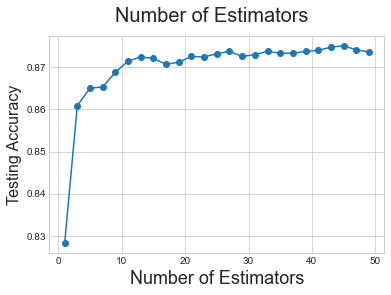

In [ ]:
# find the best Estimators of Random Forest
import matplotlib.pyplot as plt

score_array =[]
num_estimators = []
for k in range(1,50,2): 
    clf = RandomForestClassifier(n_estimators=k, random_state=1, max_depth=10)
    clf = clf.fit(X_train_sample, Y_train_sample)

    #Predict the response for test dataset
    score_array.append(clf.score(X_test, Y_test)) 
    num_estimators.append(k)
    
fig = plt.figure()
plt.plot(num_estimators, score_array, marker='o')
fig.suptitle('Number of Estimators', fontsize=20)
plt.xlabel('Number of Estimators', fontsize=18)
plt.ylabel('Testing Accuracy', fontsize=16)

In [ ]:
rfc = RandomForestClassifier(n_estimators=28, 
                             max_depth=None,
                             min_samples_leaf=8,
                             min_samples_split=29, 
                             criterion='gini', 
                             max_features=8)
rfc.fit(X_train_sample, Y_train_sample)
y_pre = rfc.predict(X_test)
y_train_pre = rfc.predict(X_train_sample)
print('Train Acc: ', metrics.accuracy_score(y_train_pre,Y_train_sample))
print('Test Acc: ', metrics.accuracy_score(y_pre,Y_test))

Train Acc:  0.9520614516381878
Test Acc:  0.8956098639831914


In [ ]:
print('Train MCC: '+ str(metrics.matthews_corrcoef(y_train_pre,Y_train_sample)))

Train MCC: 0.9063630023814621


In [ ]:
RF_MCC = metrics.matthews_corrcoef(y_pre,Y_test)
print("Test MCC: "+ str(RF_MCC))

Test MCC: 0.5772984124879722


In [ ]:
cm = metrics.confusion_matrix(Y_test, y_pre)
print('Confusion Matrix: \n', cm)

Confusion Matrix: 
 [[7316  711]
 [ 237  779]]


In [ ]:
# Test Score
from sklearn.metrics import classification_report
print (metrics.classification_report(Y_test, y_pre))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8027
           1       0.52      0.77      0.62      1016

    accuracy                           0.90      9043
   macro avg       0.75      0.84      0.78      9043
weighted avg       0.92      0.90      0.90      9043



In [ ]:
# Train Score
from sklearn.metrics import classification_report
y_train_pre = rfc.predict(X_train_sample)
print (metrics.classification_report(Y_train_sample, y_train_pre))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     31895
           1       0.93      0.97      0.95     31895

    accuracy                           0.95     63790
   macro avg       0.95      0.95      0.95     63790
weighted avg       0.95      0.95      0.95     63790



### 5.2.2 Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

# Validation
kfold = 5
cv_results = cross_val_score(NB, X_train_sample, Y_train_sample, cv=kfold, scoring='accuracy')   
msg = "%s 5-fold Acc: %f (%f)" % ('NB', cv_results.mean(), cv_results.std())
print(msg)

# Eval
NB.fit(X_train_sample, Y_train_sample)
y_pre_NB = NB.predict(X_test)
y_train_pre_NB = NB.predict(X_train_sample)
print('Test Acc: ', metrics.accuracy_score(y_pre_NB,Y_test))

NB 5-fold Acc: 0.759947 (0.003026)
Test Acc:  0.8323565188543625


In [ ]:
print("Train MCC: " + str(metrics.matthews_corrcoef(y_train_pre_NB,Y_train_sample)))

Train MCC: 0.5277617225661216


In [ ]:
NB_MCC = metrics.matthews_corrcoef(y_pre_NB,Y_test)
print('Test MCC: ' + str(NB_MCC))

Test MCC: 0.42625037059653215


In [ ]:
cm = metrics.confusion_matrix(Y_test, y_pre_NB)
print('Confusion Matrix: \n', cm)

Confusion Matrix: 
 [[6811 1216]
 [ 300  716]]


### 5.2.3 SVM

In [ ]:
SVM=svm.SVC(kernel = 'rbf', C = 10, gamma = 0.01)

# Validation
kfold = 5
cv_results = cross_val_score(SVM, X_train_sample, Y_train_sample, cv=kfold, scoring='accuracy')   
msg = "%s 5-fold Acc: %f (%f)" % ('SVM', cv_results.mean(), cv_results.std())
print(msg)

# Eval
SVM.fit(X_train_sample,Y_train_sample)
y_pre_SVM = SVM.predict(X_test)
y_train_pre_SVM = SVM.predict(X_train_sample)
print('Test Acc: ', metrics.accuracy_score(y_pre_SVM,Y_test))

SVM 5-fold Acc: 0.859868 (0.005894)
Test Acc:  0.8268273802941501


In [ ]:
print("Train MCC:" + str(metrics.matthews_corrcoef(y_train_pre_SVM,Y_train_sample)))

Train MCC:0.7289527631697095


In [ ]:
SVM_MCC = metrics.matthews_corrcoef(y_pre_SVM,Y_test)
print('Test MCC: ' + str(SVM_MCC))

Test MCC: 0.4953055996793387


### 5.2.4 VotingClassifier

In [ ]:
eclf = VotingClassifier(estimators=[('rf', rfc), ('gnb', NB), ('svm', SVM)], voting='hard')

# Validation
kfold = 5
cv_results = cross_val_score(eclf, X_train_sample, Y_train_sample, cv=kfold, scoring='accuracy')   
msg = "%s 5-fold Acc: %f (%f)" % ('VotingClf', cv_results.mean(), cv_results.std())
print(msg)

# Eval
eclf.fit(X_train_sample,Y_train_sample)
y_pre_eclf = eclf.predict(X_test)
y_train_pre_eclf = eclf.predict(X_train_sample)
print('Test Acc: ', metrics.accuracy_score(y_pre_eclf,Y_test))

VotingClf 5-fold Acc: 0.886691 (0.013100)
Test Acc:  0.8740462235983634


In [ ]:
print("Train MCC:" + str(metrics.matthews_corrcoef(y_train_pre_eclf,Y_train_sample)))

Train MCC:0.7961615494302204


In [ ]:
eclf_MCC = metrics.matthews_corrcoef(y_pre_eclf,Y_test)
print('Test MCC: ' + str(eclf_MCC))

Test MCC: 0.545214918820757


### 5.2.5 LogisticRegression

In [ ]:
# Logistic Regression
LR = LogisticRegression()

# Validation
kfold = 5
cv_results = cross_val_score(LR, X_train_sample, Y_train_sample, cv=kfold, scoring='accuracy')   
msg = "%s 5-fold Acc: %f (%f)" % ('LR', cv_results.mean(), cv_results.std())
print(msg)

# Predict
LR.fit(X_train_sample, Y_train_sample)
y_pre_LR = LR.predict(X_test)
y_train_pre_LR = LR.predict(X_train_sample)
print('Test Acc: ', metrics.accuracy_score(y_pre_LR,Y_test))

LR 5-fold Acc: 0.824032 (0.004828)
Test Acc:  0.844741789229238


In [ ]:
print('Train MCC: '+ str(metrics.matthews_corrcoef(y_train_pre_LR, Y_train_sample)))

Train MCC: 0.6490110419836395


In [ ]:
LR_MCC = metrics.matthews_corrcoef(y_pre_LR,Y_test)
print("Test MCC: "+ str(LR_MCC))

Test MCC: 0.4961798701150733


In [ ]:
print (metrics.classification_report(Y_train_sample, y_train_pre))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     31895
           1       0.93      0.97      0.95     31895

    accuracy                           0.95     63790
   macro avg       0.95      0.95      0.95     63790
weighted avg       0.95      0.95      0.95     63790



In [ ]:
print (metrics.classification_report(Y_test, y_pre))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8027
           1       0.52      0.77      0.62      1016

    accuracy                           0.90      9043
   macro avg       0.75      0.84      0.78      9043
weighted avg       0.92      0.90      0.90      9043



### 5.2.6 KNN

In [ ]:
# k-Nearest Neighbors
KNN = KNeighborsClassifier()

# Validation
kfold = 5
cv_results = cross_val_score(KNN, X_train_sample, Y_train_sample, cv=kfold, scoring='accuracy')   
msg = "%s 5-fold Acc: %f (%f)" % ('KNN', cv_results.mean(), cv_results.std())
print(msg)

# Predict
KNN.fit(X_train_sample, Y_train_sample)
y_pre_KNN = KNN.predict(X_test)
y_train_pre_KNN = KNN.predict(X_train_sample)
print('Test Acc: ', metrics.accuracy_score(y_pre_KNN,Y_test))

KNN 5-fold Acc: 0.912400 (0.002711)
Test Acc:  0.8331305982527922


In [ ]:
print('Train MCC: '+ str(metrics.matthews_corrcoef(y_train_pre_KNN, Y_train_sample)))

Train MCC: 0.8825489261073572


In [ ]:
KNN_MCC = metrics.matthews_corrcoef(y_pre_KNN,Y_test)
print("Test MCC: "+ str(KNN_MCC))

Test MCC: 0.4409516942914637


In [ ]:
print (metrics.classification_report(Y_train_sample, y_train_pre_KNN))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     31895
           1       0.89      1.00      0.94     31895

    accuracy                           0.94     63790
   macro avg       0.94      0.94      0.94     63790
weighted avg       0.94      0.94      0.94     63790



In [ ]:
print (metrics.classification_report(Y_test, y_pre))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8027
           1       0.52      0.77      0.62      1016

    accuracy                           0.90      9043
   macro avg       0.75      0.84      0.78      9043
weighted avg       0.92      0.90      0.90      9043



### 5.2.7 Boosting Method

In [ ]:
'''
Validation Model
'''
# n_estimators=200: get 200 decision trees
kfold = 5
clf = AdaBoostClassifier(n_estimators=200)  
# train the model
cv_results = cross_val_score(clf, X_train_sample, Y_train_sample, cv=kfold, scoring='accuracy')    
msg = "%s 5-fold Acc: %f (%f)" % ('Boosting Tree', cv_results.mean(), cv_results.std())
print(msg)

'''
Train Model
'''
BooT = AdaBoostClassifier(n_estimators=200)  
BooT.fit(X_train_sample, Y_train_sample)
predictions = BooT.predict(X_test)
print('Test Acc: ', metrics.accuracy_score(predictions,Y_test))

Boosting Tree 5-fold Acc: 0.910519 (0.067137)
Test Acc:  0.8963839433816212


[[7512  515]
 [ 422  594]]


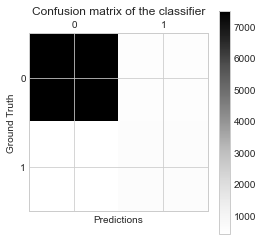

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8027
           1       0.54      0.58      0.56      1016

    accuracy                           0.90      9043
   macro avg       0.74      0.76      0.75      9043
weighted avg       0.90      0.90      0.90      9043

Train MCC: 0.8457723654882201
Test MCC:  0.5010968485268255


In [ ]:
'''
Eval Model
'''
# Confusion Matrix
cm = confusion_matrix(Y_test, predictions)
print(cm)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.xlabel("Predictions")
pl.ylabel("Ground Truth")
pl.colorbar()
pl.show()

# Classification Report
print(classification_report(Y_test, predictions))

# MCC
BT_MCC = metrics.matthews_corrcoef(predictions, Y_test)
print('Train MCC: '+ str(metrics.matthews_corrcoef(BooT.predict(X_train_sample), Y_train_sample)))
print('Test MCC: ', str(BT_MCC))

### 5.2.8 Bagging Classifier

In [ ]:
## Bagging Classifier
'''
5-fold Validation
'''
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
# n_estimators=100:生成100个决策树
clf = BaggingClassifier(base_estimator=tree, n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)
kfold = KFold(n_splits=5)    
# val the model
cv_results = cross_val_score(clf, X_train_sample, Y_train_sample, cv=kfold, scoring='accuracy')    
msg = "%s 5-fold Acc: %f (%f)" % ('Bagging Tree', cv_results.mean(), cv_results.std())
print(msg)

'''
Train Model
'''
BagT = BaggingClassifier(base_estimator=tree, n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)
BagT.fit(X_train_sample, Y_train_sample)
predictions = BagT.predict(X_test)
print('Test Acc: ', metrics.accuracy_score(predictions,Y_test))

Bagging Tree 5-fold Acc: 0.942060 (0.036169)
Test Acc:  0.9039035718235099


[[7500  527]
 [ 342  674]]


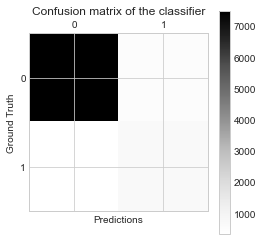

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8027
           1       0.56      0.66      0.61      1016

    accuracy                           0.90      9043
   macro avg       0.76      0.80      0.78      9043
weighted avg       0.91      0.90      0.91      9043

Train MCC: 1.0
Test MCC:  0.5562184176683101


In [ ]:
'''
Eval Model
'''
# Confusion Matrix
cm = confusion_matrix(Y_test, predictions)
print(cm)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.xlabel("Predictions")
pl.ylabel("Ground Truth")
pl.colorbar()
pl.show()

# Classification Report
print(classification_report(Y_test, predictions))

# MCC
BagT_MCC = metrics.matthews_corrcoef(predictions, Y_test)
print('Train MCC: '+ str(metrics.matthews_corrcoef(BagT.predict(X_train_sample), Y_train_sample)))
print('Test MCC: ', str(BagT_MCC))

# Part 6. conclusion <a name= '6'></a>

- It was a great learning experience working on a financial dataset.
- Our dataset consist of categorical and numerical features.
- Highest success rate is observed for end month of the financial year as well as the calendar year. So one can say that our dataset have some kind of seasonality.
- Different machine learning models are trained and tested on the dataset. 
- Different models are summarized in table below with MCC

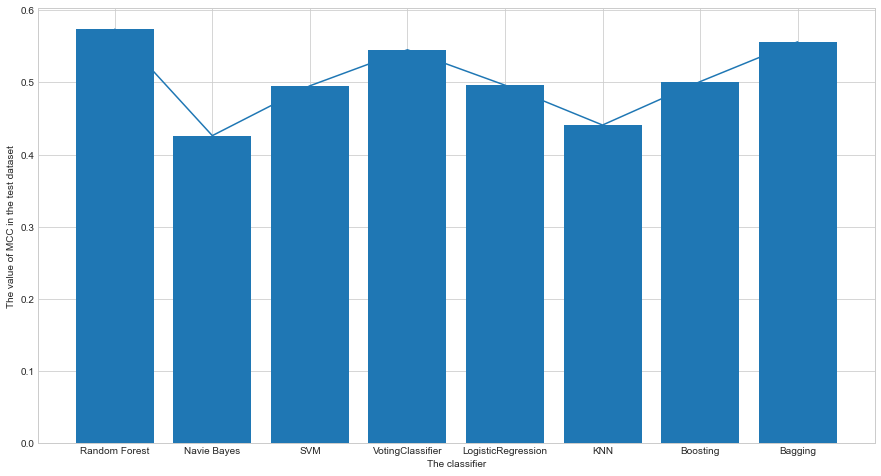

In [ ]:
x_data = ["Random Forest", "Navie Bayes", "SVM", "VotingClassifier", "LogisticRegression", "KNN", "Boosting", "Bagging"]
y_data =[RF_MCC, NB_MCC, SVM_MCC, eclf_MCC, LR_MCC, KNN_MCC, BT_MCC, BagT_MCC]
fig = plt.figure(figsize = (15,8))
plt.plot(x_data,y_data)
plt.bar(x_data,y_data)
plt.xlabel("The classifier")
plt.ylabel("The value of MCC in the test dataset")
plt.show()